In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [49]:
# Import dataset
df = pd.read_excel("Python.xlsx")

In [50]:
# Analisar primeiras 5 linhas
df.head()

,Custid,Dayswus,Age,Education,Income,Kidhome,Teenhome,Freq,Recency,Monetary,...,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,ExpressedPreference,NPS
0,1001,789,68,BachelorDegree,90782.0,0,0,29.0,66,1402,...,37,5,44.0,10,3,2,19,4.0,D,0.0
1,1002,623,78,PhD,113023.0,0,0,31.0,6,1537,...,55,1,38.0,4,2,2,9,1.0,C,NaN
2,1003,583,24,MasterDegree,28344.0,1,0,4.0,69,44,...,32,19,24.0,1,24,63,59,7.0,NaN,NaN
3,1004,893,59,MasterDegree,93571.0,0,1,21.0,10,888,...,60,10,19.0,6,5,15,35,5.0,NaN,NaN
4,1005,1062,59,MasterDegree,91852.0,0,1,25.0,26,1138,...,59,5,28.0,4,4,19,34,6.0,NaN,NaN


In [51]:
# Passar a coluna CUST_ID para o índex da tabela
df.set_index("Custid", inplace = True)
df.head()

,Dayswus,Age,Education,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,...,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,ExpressedPreference,NPS
Custid,,,,,,,,,,,,,,,,,,,,,
1001,789,68,BachelorDegree,90782.0,0,0,29.0,66,1402,699,...,37,5,44.0,10,3,2,19,4.0,D,0.0
1002,623,78,PhD,113023.0,0,0,31.0,6,1537,565,...,55,1,38.0,4,2,2,9,1.0,C,NaN
1003,583,24,MasterDegree,28344.0,1,0,4.0,69,44,-3,...,32,19,24.0,1,24,63,59,7.0,NaN,NaN
1004,893,59,MasterDegree,93571.0,0,1,21.0,10,888,207,...,60,10,19.0,6,5,15,35,5.0,NaN,NaN
1005,1062,59,MasterDegree,91852.0,0,1,25.0,26,1138,355,...,59,5,28.0,4,4,19,34,6.0,NaN,NaN


# Data Understanding

In [52]:
# Análise da tabela
n_rows, n_columns = df.shape
print("O dataset tem {} Linhas e {} Colunas.".format(n_rows, n_columns))

O dataset tem 10000 Linhas e 21 Colunas.


In [53]:
# Descrição dos dados
df.dtypes

Dayswus                  int64
Age                      int64
Education               object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Freq                   float64
Recency                  int64
Monetary                 int64
LTV                      int64
Perdeal                  int64
Dryred                   int64
Sweetred                 int64
Drywh                  float64
Sweetwh                  int64
Dessert                  int64
Exotic                   int64
WebPurchase              int64
WebVisit               float64
ExpressedPreference     object
NPS                    float64
dtype: object

**Insights**
* Só há 2 variáveis categóricas: Education e Expressed Preference.

In [54]:
df.describe()

,Dayswus,Age,Income,Kidhome,Teenhome,Freq,Recency,Monetary,LTV,Perdeal,Dryred,Sweetred,Drywh,Sweetwh,Dessert,Exotic,WebPurchase,WebVisit,NPS
count,10000.000000,10000.000000,9993.000000,10000.000000,10000.000000,9981.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,9970.000000,10000.000000,10000.000000,10000.000000,10000.000000,9998.000000,2219.000000
mean,898.102000,47.927300,69919.134394,0.418800,0.469800,14.602745,62.406800,9.263313e+02,208.771500,32.397200,50.382700,7.054500,28.525276,7.069800,6.947400,16.546600,42.376200,5.216743,5.035151
std,202.492789,17.302721,27610.471317,0.493387,0.499112,11.990234,69.874255,1.622397e+04,293.736577,27.897094,23.453815,7.866544,12.587525,8.015083,7.879546,17.247672,18.522062,2.330399,3.214966
min,550.000000,18.000000,10000.000000,0.000000,0.000000,-36.000000,0.000000,6.000000e+00,-3000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,723.750000,33.000000,47684.000000,0.000000,0.000000,4.000000,26.000000,6.300000e+01,-2.000000,6.000000,32.000000,2.000000,19.000000,2.000000,2.000000,4.000000,28.000000,3.000000,2.000000
50%,894.000000,48.000000,70017.000000,0.000000,0.000000,12.000000,52.000000,3.830000e+02,57.000000,25.000000,51.000000,4.000000,28.000000,4.000000,4.000000,10.000000,45.000000,6.000000,5.000000
75%,1074.000000,63.000000,92162.000000,1.000000,1.000000,24.000000,78.250000,1.077000e+03,364.000000,56.000000,69.000000,10.000000,37.000000,10.000000,9.000000,23.000000,57.000000,7.000000,8.000000
max,1250.000000,78.000000,140628.000000,1.000000,1.000000,56.000000,549.000000,1.150000e+06,1791.000000,97.000000,99.000000,75.000000,74.000000,62.000000,77.000000,96.000000,88.000000,10.000000,10.000000


**Insights**
* Freq tem valores negativos. Não é possível ter um número de compras negativo.
* Income é anual.
* Há algumas variáveis skewed. A analisar com melhor atenção à frente, de forma visual.
* NPS com demasiados valores em falta.

In [55]:
df.describe(include = 'object')

,Education,ExpressedPreference
count,9997,2467
unique,7,4
top,MasterDegree,A
freq,4663,646


**Insights**
* Education tem demasiados resultados únicos.
* ExpressedPreference tem demasiados valores em falta.

In [56]:
# Análise de todos os valores únicos na base de dados para tentar encontrar valores estranhos
for col in df:
    print(df[col].unique())

[ 789  623  583  893 1062  792 1120  658 1109  664  818  657  619 1133
  655  624  940  788  589  778 1108  683 1178  680  824 1048  558  697
  614  838  652  903  950  854 1127  554 1226  661  875  902  656 1034
 1208  622 1083  745  927  672  972  599  668  905  989 1240  857  956
 1055  608  826 1140  999 1084  737 1216  571 1217 1051 1199  772  771
  881 1239  801  602  651 1078  883 1070 1215  952  983  570  967 1106
  916  621  997  933  723  728  607  574  946  793  670  937  973  580
 1126 1206  767 1165  842  675  636 1032  647  567  885  911  649 1212
 1089 1185 1031  813  963  709 1156  994 1207  964  894  812 1141  685
  897 1072  951 1228  988  611  878  628 1038  710  935 1171  914  837
 1043  773  868  928 1029  774  721 1134  638  802  896 1093  922  809
  862  795  555  986  783  879  895  736  814  612 1223 1125 1230  938
  800  947  679 1131  561  659 1086 1184  953  873  703  942  609 1076
  617  860  740 1010 1237  839  585  729  900  763  832 1170  987  968
  576 

**Insights**
* Education tem valores estranhos.

In [57]:
# Número de Missing Values por Variável
print(df.isna().sum())

print("--")

# Percentagem dos missing values por variável
print(df.isna().sum()/df.shape[0]*100)

Dayswus                   0
Age                       0
Education                 3
Income                    7
Kidhome                   0
Teenhome                  0
Freq                     19
Recency                   0
Monetary                  0
LTV                       0
Perdeal                   0
Dryred                    0
Sweetred                  0
Drywh                    30
Sweetwh                   0
Dessert                   0
Exotic                    0
WebPurchase               0
WebVisit                  2
ExpressedPreference    7533
NPS                    7781
dtype: int64
--
Dayswus                 0.00
Age                     0.00
Education               0.03
Income                  0.07
Kidhome                 0.00
Teenhome                0.00
Freq                    0.19
Recency                 0.00
Monetary                0.00
LTV                     0.00
Perdeal                 0.00
Dryred                  0.00
Sweetred                0.00
Drywh              

**Insights**
* ExpressedPreference e NPS são para remover.
* Esquecendo as variáveis acima referidas, há 0.61% de dados em falta (61 observações). Remover? Em Drywh podemos imputar a diferença entre 100 e a soma das restantes percentagens. Remover as restantes.

### Análise Visual

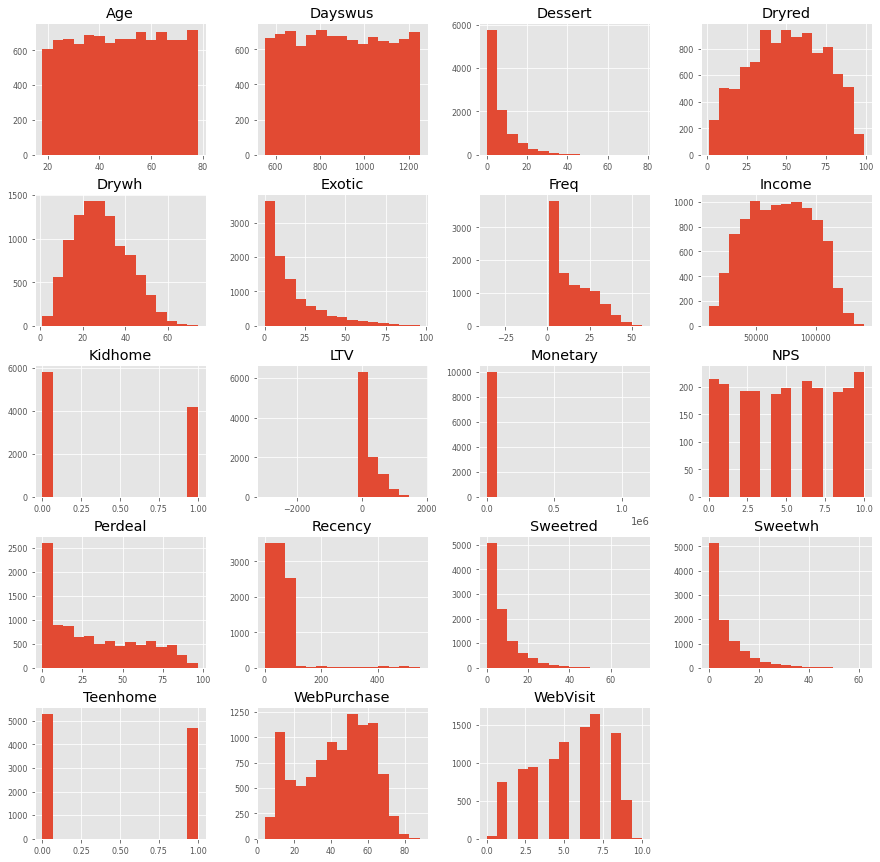

In [58]:
# Histrogramas de todas as variáveis numéricas
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 15), layout=(5, 4), xlabelsize=8, ylabelsize=8);

**Insights**
* Dessert, Exotic, Freq, LTV, Monetary, Perdeal, Recency, Sweetred e Sweetwh são right skewed.

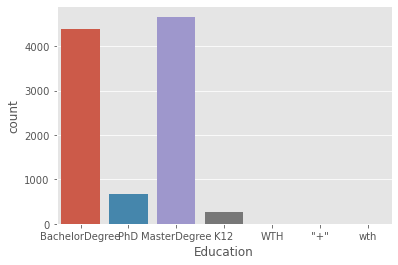

In [59]:
# Histograma de Education
sns.countplot(x = 'Education', data = df)

**Insights**
* Confirma-se que Education tem valores estranhos.

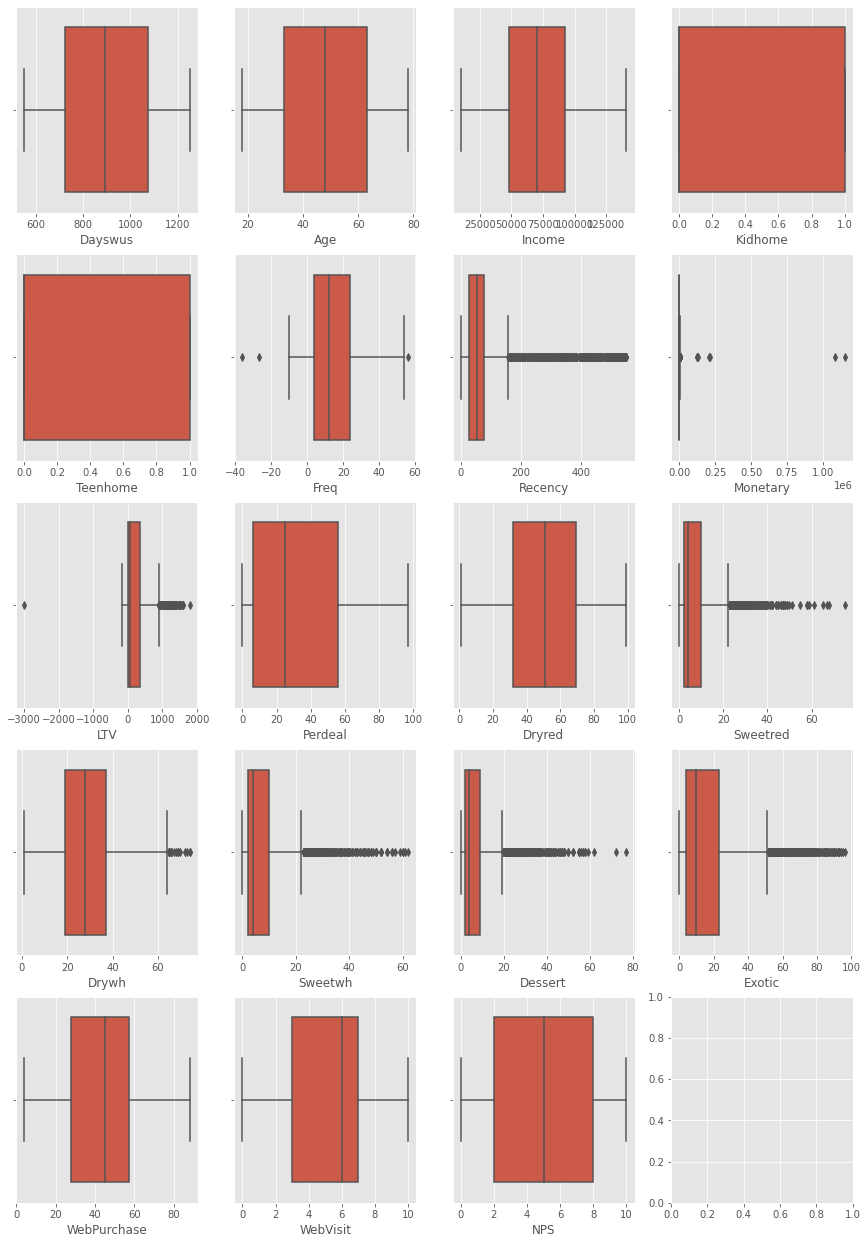

In [60]:
# Boxplots nas variáveis numéricas
fig, ax = plt.subplots(5, 4, figsize=(15, 22))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

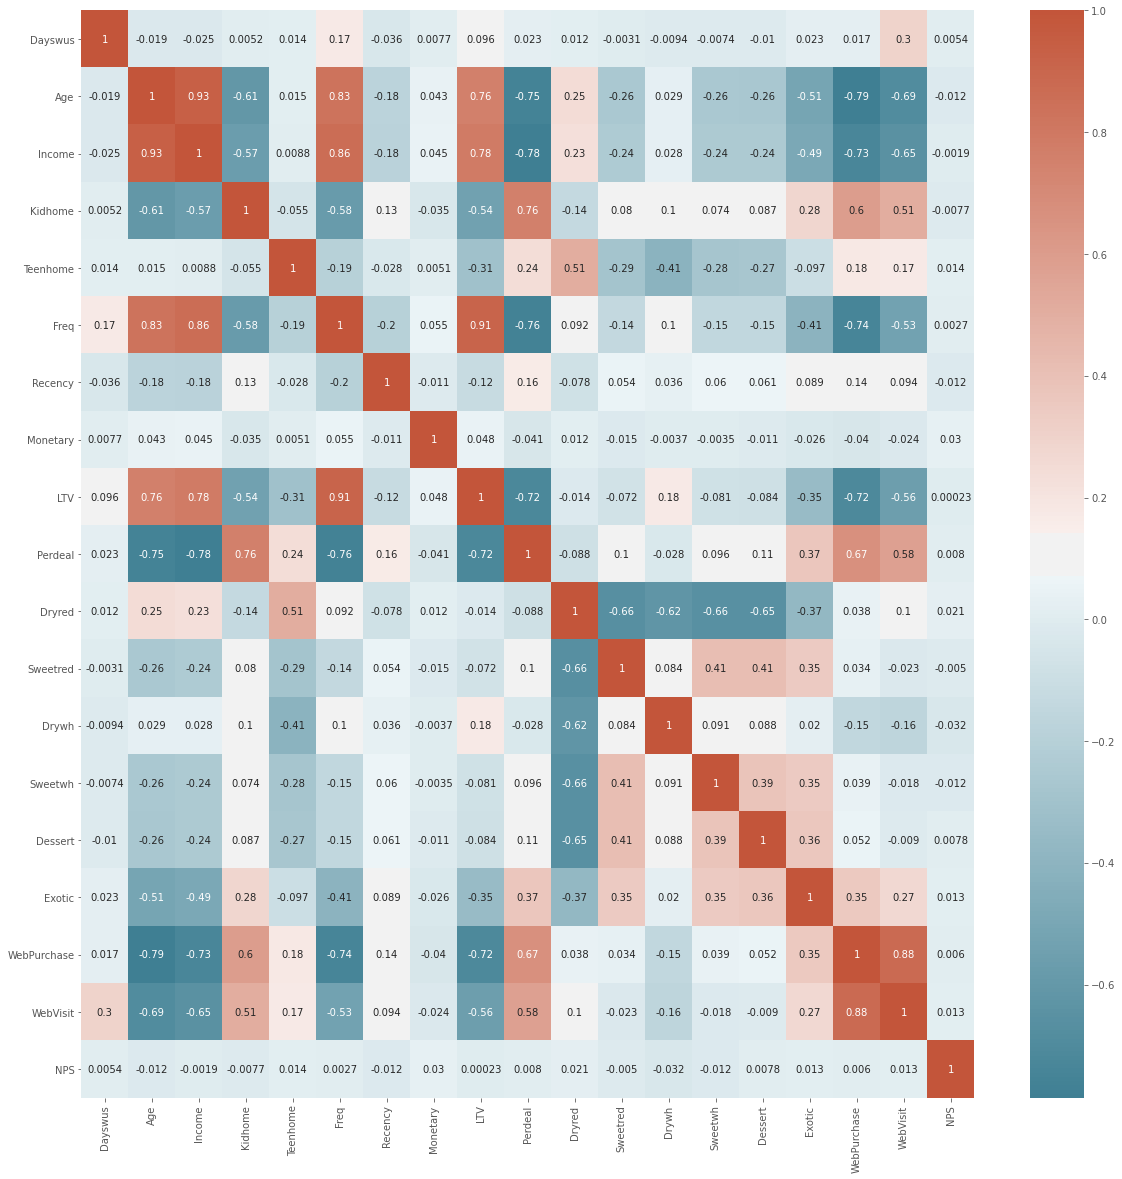

In [61]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

In [62]:
dataCorr = df.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.7 ]

print('Correlations over/under 0.7 in the following variables:', "\n", strong_pairs,"\n", strong_pairs2)

Correlations over/under 0.7 in the following variables: 
 WebPurchase  Age           -0.785863
Perdeal      Income        -0.784001
             Freq          -0.762804
             Age           -0.753151
WebPurchase  Freq          -0.739381
             Income        -0.734382
Perdeal      LTV           -0.716199
WebPurchase  LTV           -0.715152
Perdeal      Kidhome        0.755852
LTV          Age            0.758007
             Income         0.784438
Freq         Age            0.830642
             Income         0.864742
WebVisit     WebPurchase    0.881340
LTV          Freq           0.911736
Income       Age            0.933612
dtype: float64 
 Series([], dtype: float64)


# Data Preparation

* Remover variáveis com muitos missing values
* Remover ou Transformar os valores em Freq menores a 0
* Imputar valores em Drywh com a diferença entre 100 e a soma das outras variáveis de % e remover restantes valores em falta
* Remover outliers, fazendo por não retirar mais de 3% dos dados
* Remover observações com valores estranhos em Education
* O que fazer com observações em que soma de % são diferentes de 100?
* Criar novas variáveis: ver Excel: https://drive.google.com/file/d/1qE8lYN5EP5w3Sv_R75e8uqu4wkv3ipxf/view?usp=sharing
* Rever correlações e remover variáveis correlacionadas(?)